In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('assets/lung.jpg')

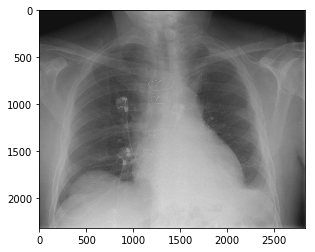

In [2]:
# display the image
plt.imshow(img, cmap='gray')

In [3]:
# convert image into a numpy array
img = np.asarray(img)

(array([2.54744e+05, 3.29750e+04, 2.84610e+04, 3.81710e+04, 4.17830e+04,
        3.24140e+04, 4.20520e+04, 4.02320e+04, 5.42120e+04, 9.73400e+04,
        1.28929e+05, 1.92359e+05, 2.15888e+05, 1.95032e+05, 2.40086e+05,
        1.83728e+05, 2.20924e+05, 2.16664e+05, 1.74543e+05, 2.20450e+05,
        2.10157e+05, 2.04915e+05, 2.77649e+05, 2.13633e+05, 2.65266e+05,
        2.57493e+05, 2.04429e+05, 2.43111e+05, 1.80962e+05, 1.97871e+05,
        1.86692e+05, 1.30918e+05, 1.41807e+05, 1.32372e+05, 1.06116e+05,
        1.35457e+05, 1.04864e+05, 1.40849e+05, 1.72023e+05, 1.40544e+05,
        1.79990e+05, 6.97460e+04, 9.66500e+03, 3.32200e+03, 1.13000e+02,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 17.  ,  21.62,  26.24,  30.86,  35.48,  40.1 ,  44.72,  49.34,
         53.96,  58.58,  63.2 ,  67.82,  72.44,  77.06,  81.68,  86.3 ,
         90.92,  95.54, 100.16, 104.78, 109.4 , 114.02, 118.64, 123.26,
        127.88, 132.5 , 137.12, 141.74, 146.36, 150.

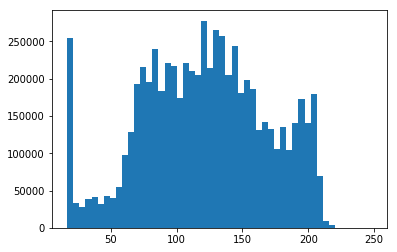

In [4]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [5]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

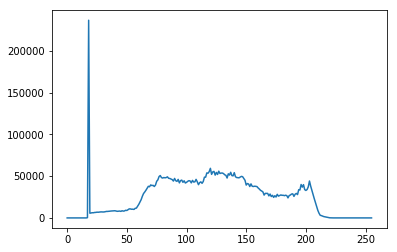

In [6]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

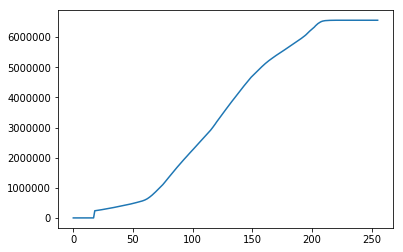

In [7]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [8]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

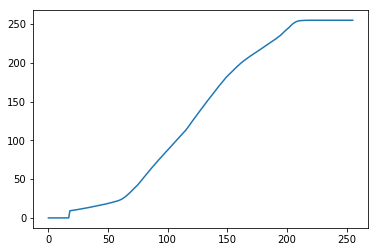

In [9]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

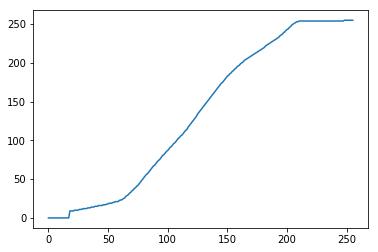

In [10]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([   316., 280620., 123463., 127277., 130708., 128929., 114622.,
        115335., 128771., 148520., 144021., 144891.,  93718., 137215.,
        134321., 131849., 128840., 130942., 131112., 132250., 168440.,
         84984., 151406., 108928., 166571., 106903., 106461., 162788.,
        106778., 150373., 158748., 100990., 151777.,  96152., 147955.,
        131628., 119284., 154152., 111127., 130918., 170409., 128800.,
        135647., 107601., 135533., 111377., 144121., 140544., 119490.,
        143355.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

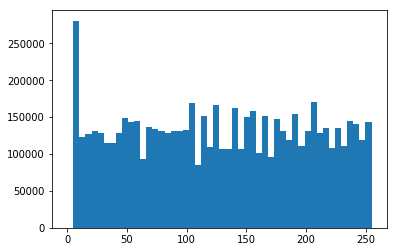

In [11]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [12]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[  9,   9,   9, ...,  14,  15,  16],
       [  9,   9,   9, ...,  14,  15,  16],
       [  9,   9,   9, ...,  14,  15,  16],
       ...,
       [ 96,  94,  97, ...,  19,  19,  21],
       [ 97,  96, 101, ...,  20,  20,  21],
       [ 99,  99, 101, ...,  21,  20,  21]], dtype=uint8)

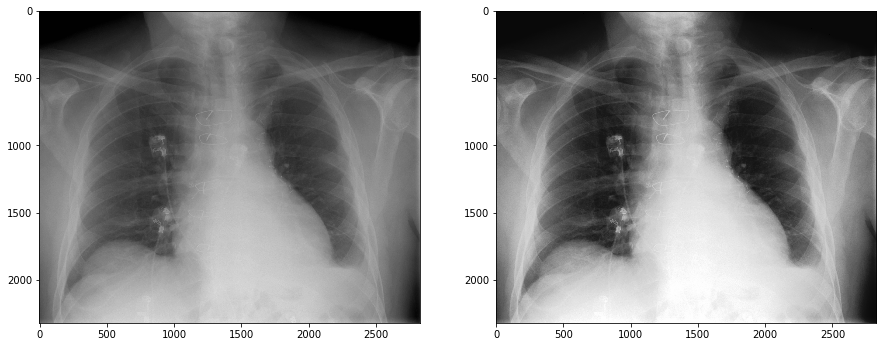

In [13]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)